# Pre Processing

## u.data

In [2]:
import pandas as pd
import numpy as np

In [3]:
dfData = pd.read_csv('./MovieLens_Data/ml-100k/u-data.data', header = None, sep='\t', names = ['USER_ID', 'ITEM_ID', 'RATING', 'TIMESTAMP'])
dfData

,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
#Check for null values
dfData.isnull().sum()

USER_ID      0
ITEM_ID      0
RATING       0
TIMESTAMP    0
dtype: int64

In [5]:
#Get statistical info about ratings
dfData['RATING'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: RATING, dtype: float64

<AxesSubplot:>

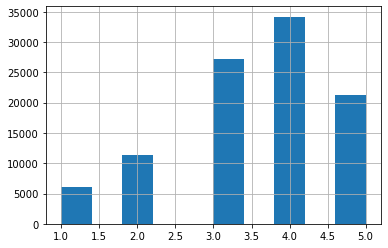

In [6]:
dfData['RATING'].hist()

In [7]:
#Get mean rating and rating counts for each item
dfRatings = pd.DataFrame(dfData.groupby('ITEM_ID')['RATING'].mean())
dfRatings['COUNTS'] = dfData.groupby('ITEM_ID')['RATING'].count()

In [8]:
dfRatings

,RATING,COUNTS
ITEM_ID,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86
...,...,...
1678,1.000000,1
1679,3.000000,1
1680,2.000000,1


In [9]:
#Statistical summary about mean rating and counts.
dfRatings.describe()

,RATING,COUNTS
count,1682.000000,1682.000000
mean,3.076045,59.453032
std,0.781662,80.383846
min,1.000000,1.000000
25%,2.659600,6.000000
50%,3.161528,27.000000
75%,3.653428,80.000000
max,5.000000,583.000000


array([[<AxesSubplot:title={'center':'RATING'}>,
        <AxesSubplot:title={'center':'COUNTS'}>]], dtype=object)

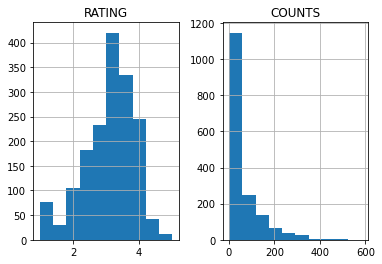

In [10]:
dfRatings.hist()

Most of the movies have lower rating counts.

<AxesSubplot:xlabel='COUNTS', ylabel='RATING'>

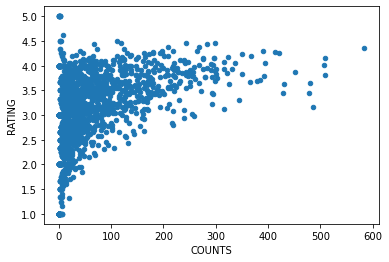

In [11]:
dfRatings.plot.scatter('COUNTS', 'RATING')

Lower rating is associated with lower counts.

Let's cut half of the movies, considering just counts > 27.

In [12]:
dfRatingsCut = dfRatings.loc[dfRatings['COUNTS'] > 27, :]

In [13]:
dfRatingsCut.shape

(827, 2)

In [14]:
dfRatingsCut.describe()

,RATING,COUNTS
count,827.000000,827.000000
mean,3.417310,111.636034
std,0.509094,87.902953
min,1.840909,28.000000
25%,3.072824,47.500000
50%,3.459854,81.000000
75%,3.817745,148.000000
max,4.491071,583.000000


array([[<AxesSubplot:title={'center':'RATING'}>,
        <AxesSubplot:title={'center':'COUNTS'}>]], dtype=object)

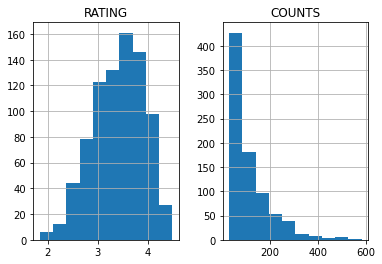

In [15]:
dfRatingsCut.hist()

<AxesSubplot:xlabel='COUNTS', ylabel='RATING'>

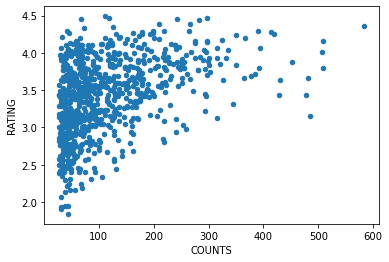

In [16]:
dfRatingsCut.plot.scatter('COUNTS', 'RATING')

## u.user

In [32]:
dfUsers = pd.read_csv('./MovieLens_Data/ml-100k/u-user.user', header = None, sep='|', names = ['USER_ID', 'AGE', 'GENDER', 'OCCUPATION', 'ZIP_CODE'], index_col = 'USER_ID')

In [33]:
dfUsers

,AGE,GENDER,OCCUPATION,ZIP_CODE
USER_ID,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [36]:
#Add number of ratings per user
dfUsers['COUNTS'] = pd.DataFrame(dfData.groupby('USER_ID')['RATING'].count())
dfUsers

,AGE,GENDER,OCCUPATION,ZIP_CODE,COUNTS
USER_ID,,,,,
1,24,M,technician,85711,272
2,53,F,other,94043,62
3,23,M,writer,32067,54
4,24,M,technician,43537,24
5,33,F,other,15213,175
...,...,...,...,...,...
939,26,F,student,33319,49
940,32,M,administrator,02215,107
941,20,M,student,97229,22


In [37]:
#Statistics about users
dfUsers.describe()

,AGE,COUNTS
count,943.000000,943.000000
mean,34.051962,106.044539
std,12.192740,100.931743
min,7.000000,20.000000
25%,25.000000,33.000000
50%,31.000000,65.000000
75%,43.000000,148.000000
max,73.000000,737.000000


In [39]:
#Number of males and females
dfUsers['GENDER'].value_counts()

M    670
F    273
Name: GENDER, dtype: int64

In [41]:
#Number of ratings by males and females
dfUsers.groupby('GENDER')['COUNTS'].sum()

GENDER
F    25740
M    74260
Name: COUNTS, dtype: int64

<AxesSubplot:>

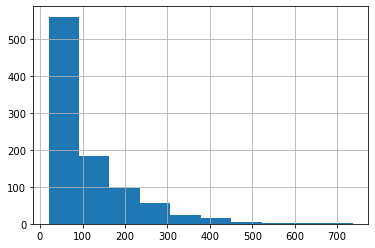

In [43]:
#Distribution of rating counts
dfUsers['COUNTS'].hist()

## u1.base and u1.test

In [17]:
df1base = pd.read_csv('./MovieLens_Data/ml-100k/u1-base.base', header = None, sep='\t', names = ['USER_ID', 'ITEM_ID', 'RATING', 'TIMESTAMP'])
df1test = pd.read_csv('./MovieLens_Data/ml-100k/u1-test.test', header = None, sep='\t', names = ['USER_ID', 'ITEM_ID', 'RATING', 'TIMESTAMP'])

In [21]:
df1base.loc[df1base['USER_ID'] == 1,:]

,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
130,1,263,1,875693007
131,1,268,5,875692927
132,1,269,5,877482427
133,1,270,5,888732827


In [45]:
df1test.loc[df1test['USER_ID'] == 1,:]

,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
...,...,...,...,...
132,1,264,2,875071713
133,1,265,4,878542441
134,1,266,1,885345728
135,1,267,4,875692955
